In [1]:
MAKE_BOOK_FIGURES=True

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def set_notebook_style():
    plt.style.use('seaborn-v0_8-white')
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings - using default sizes
        'font.family': 'serif',
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 9,
        'ytick.labelsize': 9,
        'legend.fontsize': 9,
        
        # Line and marker settings
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout settings
        'figure.constrained_layout.use': True,
        
        # Remove only top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional settings
        'figure.autolayout': True,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.1
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)

def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
else:
    set_notebook_style()

make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

(continuous-inverse-sampling)=
# Sampling from continuous distributions - Inverse sampling

How do you sample an arbitrary univariate continuous random variable $X$ with CDF $F(x)$?
In this scenario, *inverse sampling* is the way to go.
It relies on the observation that the random variable

$$
Y = F^{-1}(U),
$$

where $F^{-1}$ is the inverse of the CDF of $X$ and $U\sim\mathcal{U}([0,1])$ has exactly the same distribution as $X$.

```{admonition} Proof
:class: dropdown

It suffice to show that $Y$ has the same CDF as $X$.
Here we go:

$$
\begin{align*}
p(Y\le y) &= p(F^{-1}(U)\le x)\\
&= p(U\le F(x))\\
&= F(x),
\end{align*}
$$

where in the last step we used the fact that $U\sim\mathcal{U}([0,1])$ and therefore $p(U\le u) = u$.

```

We will demonstrate this by example. To this end, let us consider an [exponential random variable](https://en.wikipedia.org/wiki/Exponential_distribution):

$$
X \sim \operatorname{Exp}(r),
$$

where $r > 0$ is known as the *rate parameter*.
The exponential distribution describes the time between random events that occur at a constant rate $r$.
The CDF of the Exponential is:

$$
F(x) = p(X\le x) = 1 - e^{-rx}.
$$

Let's plot it for $r=0.5$.

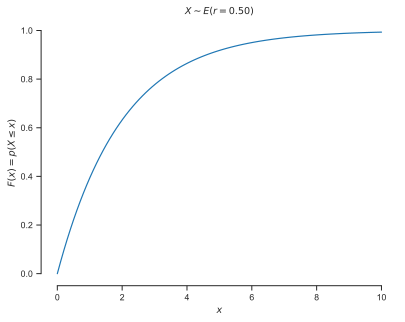

In [2]:
import scipy.stats as st
import numpy as np

r = 0.5
X = st.expon(scale=1.0 / r)

fig, ax = plt.subplots()
x = np.linspace(0., 5. / r, 100)
ax.plot(x, X.cdf(x))
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$F(x) = p(X \leq x)$")
ax.set_title(f"$X\sim E(r={r:1.2f})$")
sns.despine(trim=True);

To sample $X$ using inverse sampling, we need the inverse of the CDF. This is easily shown to be:

$$
F^{-1}(u) = -\frac{\ln(1-u)}{r}.
$$

Let's see if this is going to give us the right samples.
We will compare the empirical histogram obtained by inverse sampling to the actual PDF $p(x)$. Here is the code for inverse sampling:

In [3]:
def sample_exp(r : float):
    """Sample from an exponential.
    
    Arguments:
    r  --  The rate parameter.
    """
    u = np.random.rand()
    return -np.log(1. - u) / r

And here is the histogram of some samples:

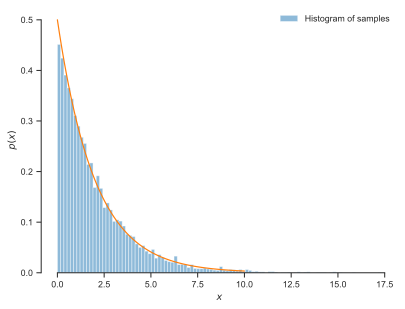

In [4]:
N = 10000
x_samples = np.array(
    [sample_exp(r) for _ in range(N)]
)

fig, ax = plt.subplots()
ax.hist(
    x_samples,
    alpha=0.5,
    density=True,
    bins=100,
    label="Histogram of samples"
)
ax.plot(x, X.pdf(x))
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$p(x)$")
plt.legend(loc=r"best", frameon=False)
sns.despine(trim=True);

## Questions

+ Modify the code above to implement inverse sampling for a univariate Gaussian with zero mean and unit variance. Use ``scipy.stats`` to find the inverse CDF of the Gaussian (It is ``st.norm.ppf``). Here is how to use it:

In [5]:
# Standard normal random variable
Z = st.norm(loc=0.0, scale=1.0)
# The inverse CDF of the standard normal, say at 0.7, can be evaluated by:
Z.ppf(0.7)

0.5244005127080407